![](https://i.imgur.com/0AUxkXt.png)

# Lecture 3 - Data Manipulation

In [8]:
%config InlineBackend.figure_format ='retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

## Filling missing data


In [2]:
# https://www.kaggle.com/camnugent/california-housing-prices
!wget -nc https://khoi-public.s3-ap-southeast-1.amazonaws.com/housing.csv
housing = pd.read_csv("housing.csv")

--2019-07-30 19:33:09--  https://khoi-public.s3-ap-southeast-1.amazonaws.com/housing.csv
Resolving khoi-public.s3-ap-southeast-1.amazonaws.com (khoi-public.s3-ap-southeast-1.amazonaws.com)... 52.219.36.196
Connecting to khoi-public.s3-ap-southeast-1.amazonaws.com (khoi-public.s3-ap-southeast-1.amazonaws.com)|52.219.36.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  2.48MB/s    in 0.5s    

2019-07-30 19:33:10 (2.48 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


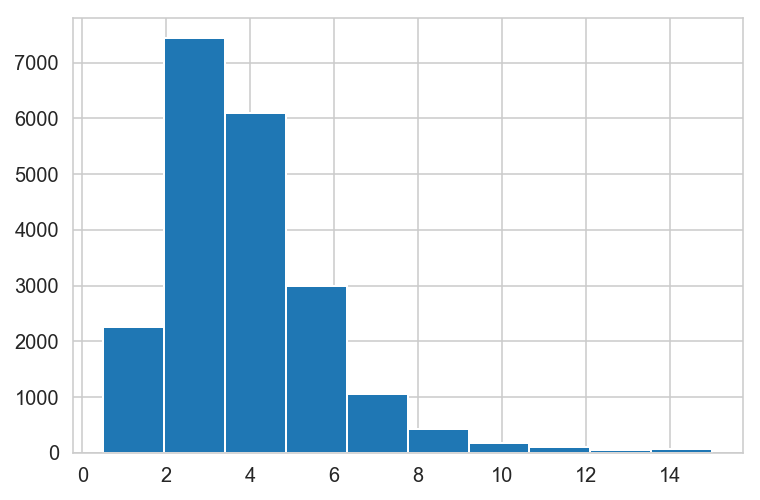

In [9]:
housing["median_income"].hist()

In [10]:
# feature enginerring, adding new feature
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=["Poor", "Alright", "Good", "Rich", "Hell Yeah"])
housing["income_cat"].value_counts()

Good         7236
Alright      6581
Rich         3639
Hell Yeah    2362
Poor          822
Name: income_cat, dtype: int64

## Some visualization

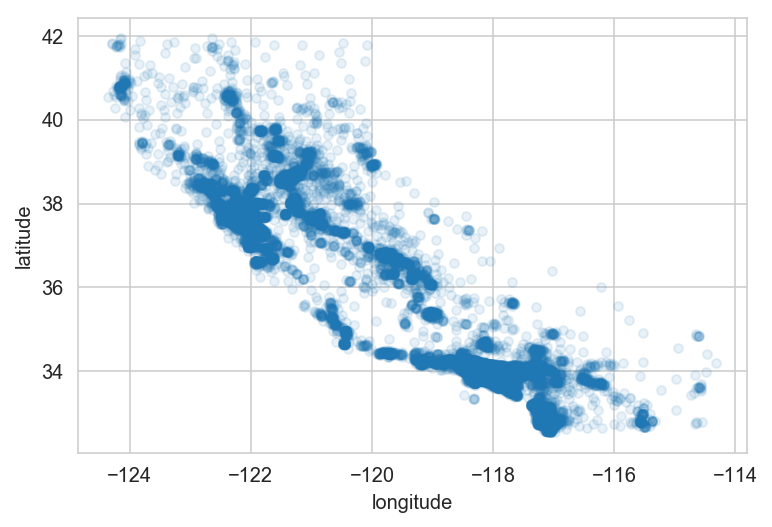

In [12]:
housing.plot(kind="scatter",x="longitude", y="latitude", alpha=0.1)

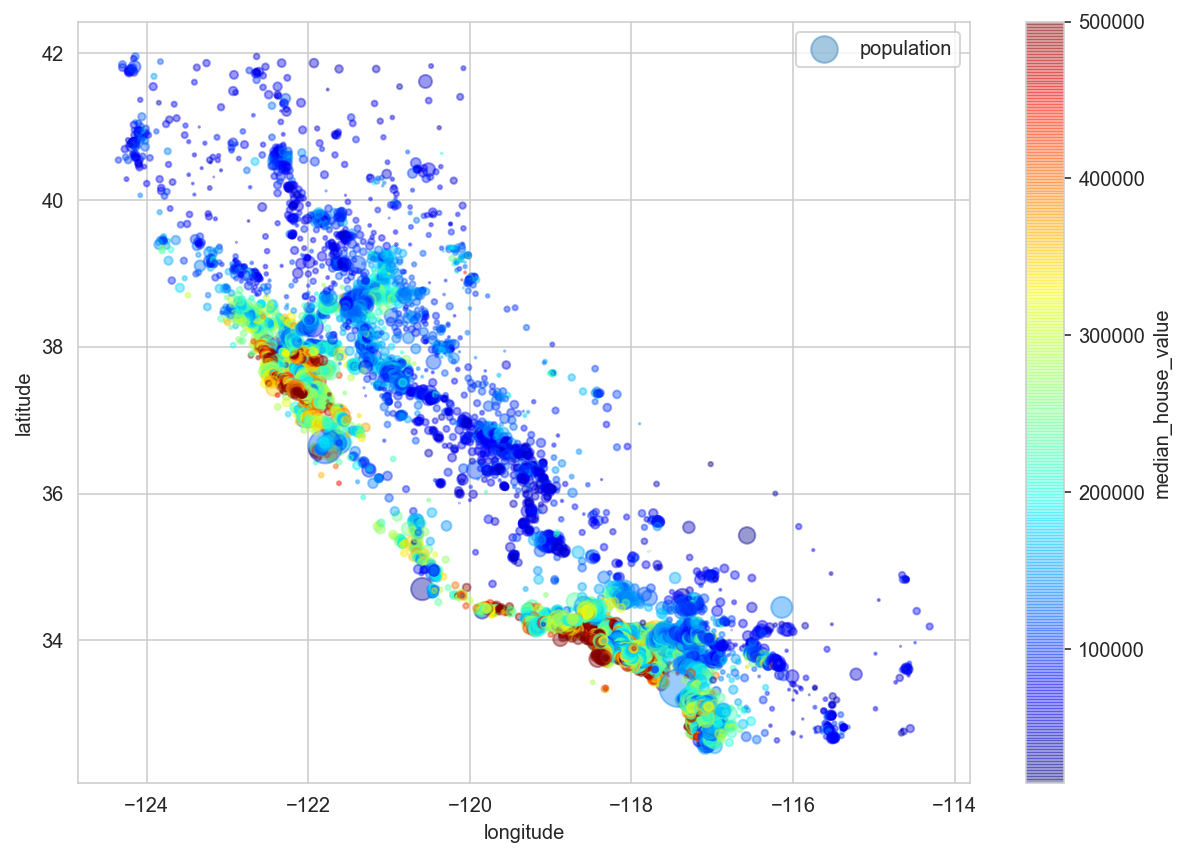

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

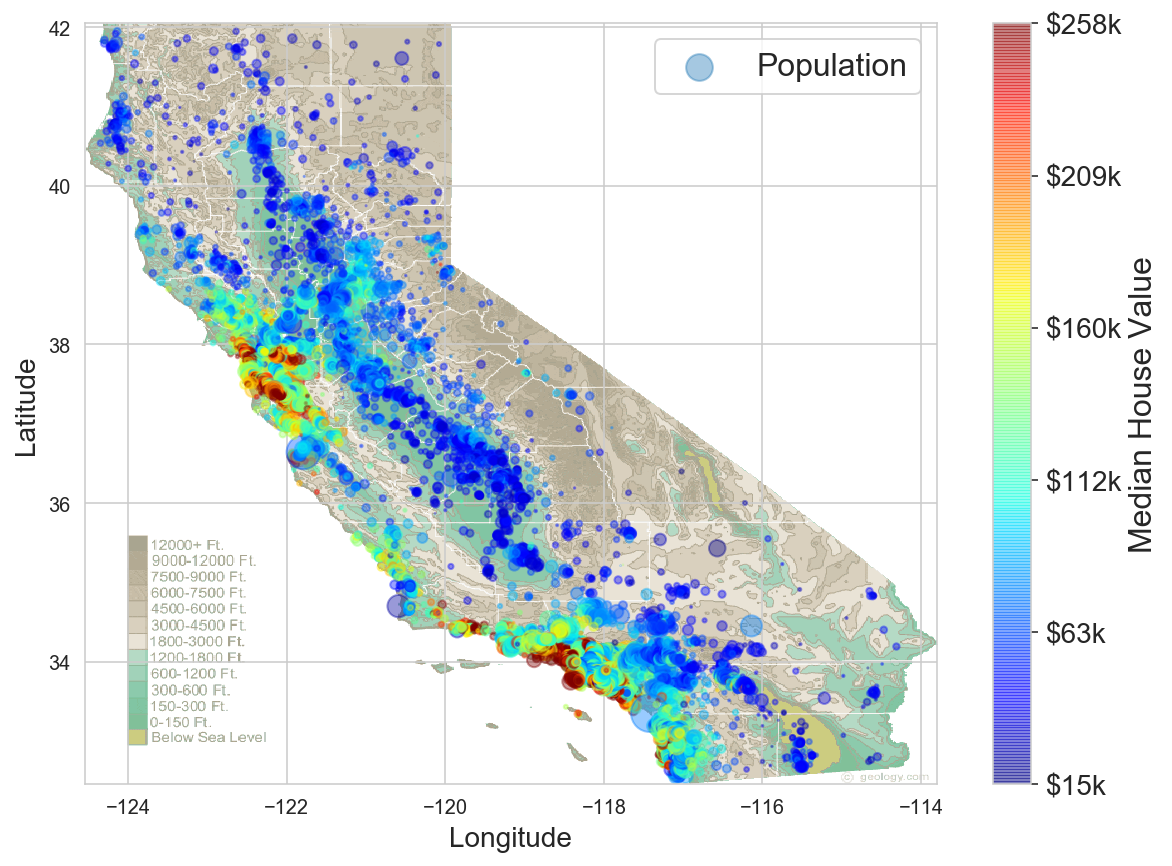

In [14]:
import matplotlib.image as mpimg
california_img = mpimg.imread('https://khoi-public.s3-ap-southeast-1.amazonaws.com/california-state-map.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [15]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


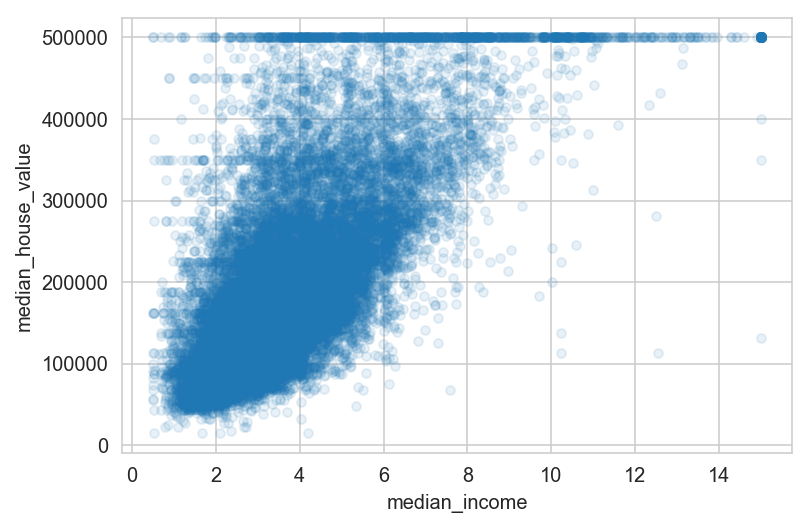

In [16]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

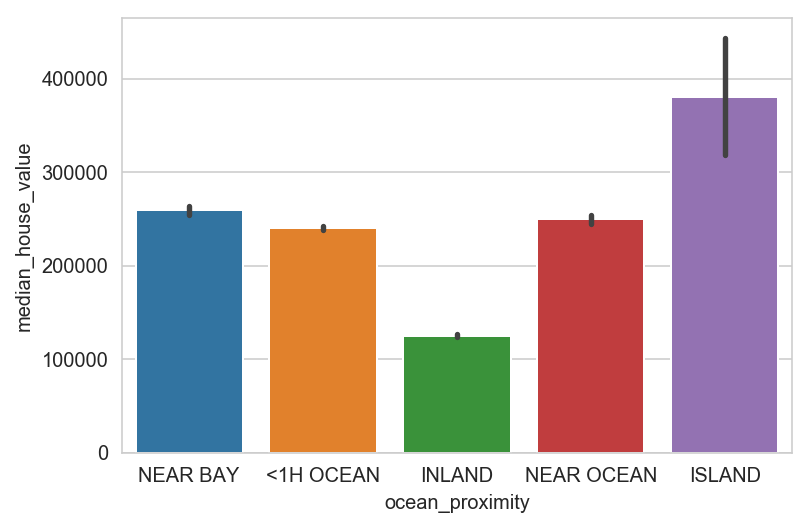

In [22]:
sns.barplot(x = 'ocean_proximity', y = 'median_house_value', data = housing)

What other features that could be engineered in to predict the housing price?


## Filling missing values

In [17]:
housing[housing["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,Good
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,Alright
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,Alright
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,Rich
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,Good
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY,Rich
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND,Rich
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND,Good
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND,Good
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY,Hell Yeah


In [19]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

## Practice

**Handling with different format of phone numbers**

In [60]:
phoneNumbers = [
    '      392969437', '339599939', '+(84)982554028', '0084982554028',
    '939224327', '929221869', '982554028', '+(84)906670964', '0084971117397',
    '974914174', '945481728    ', '84925481146', '332696839', '814200997',
    '798030258', '843756291', '904864089', '972647803', '907491419     ',
    '+84 938 175 164', '962687145', '972996711', '908271465', '907292137',
    '395180750', '     906789743', '767693801', '813994299', '366132601',
    '866765227', '+(84) 359636387', '+84969541095', '965918383', '849541095',
    '84934116689'
]

df = pd.DataFrame(phoneNumbers, columns=['phone'])

,phone,phone_normalized
0,392969437,0392969437
1,339599939,0339599939
2,+(84)982554028,0982554028
3,0084982554028,0982554028
4,939224327,0939224327
5,929221869,0929221869
6,982554028,0982554028
7,+(84)906670964,0906670964
8,0084971117397,0971117397
9,974914174,0974914174


Let's assume that a valid phone number is:
- Start with `0`
- Must have the len of 10

Build a new column called `phone_normalized` that contains the processed `phone`

In [61]:
import re

df['phone_normalized'] = df['phone'].apply(lambda a: re.sub(r"[ \(\)]","", a))
df['phone_normalized'] = df['phone_normalized'].apply(lambda a: re.sub(r"\+84|0084","0", a))
df['phone_normalized'] = df['phone_normalized'].apply(lambda a: "0" + a if len(a) == 9 else "0" + a[2:] if len(a) == 11 and a[0:2] == "84" else a)
df

,phone,phone_normalized
0,392969437,0392969437
1,339599939,0339599939
2,+(84)982554028,0982554028
3,0084982554028,0982554028
4,939224327,0939224327
5,929221869,0929221869
6,982554028,0982554028
7,+(84)906670964,0906670964
8,0084971117397,0971117397
9,974914174,0974914174
